In [102]:
import matplotlib.pyplot as plt
from generators import *
from utils import *

In [103]:
print("CUDA device name:", torch.cuda.is_available())
print(torch.version.cuda)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

CUDA device name: True
12.8


Diffusion constant: 1.85e-01 micro m^2/s


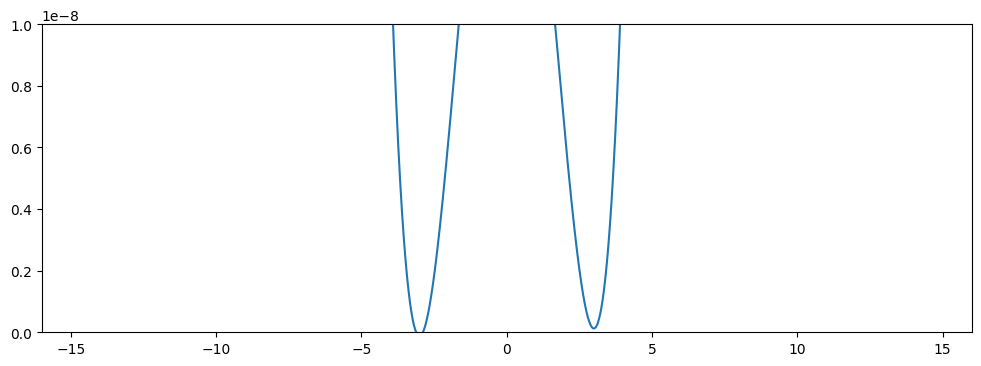

In [106]:

boltzman= 1.38e-11
zeta = 2.24e-8

T = 300
D = (T*boltzman)/zeta
t0=0
total_time = 30
time_step = 4e-3

barrier_height=boltzman*T*5#0.9e-8
left_well=-3
right_well=3
x0_mean=0
tilt= boltzman*T*0.01#1e-12#2e-50

print(f"Diffusion constant: {D:.2e} micro m^2/s")

pos=torch.arange(left_well*2-1e1,right_well*2+1e1,1e-3)
y=graph_potential(pos,barrier_height,left_well=left_well,right_well=right_well,tilt=tilt)
#y=graph_potential_classic(pos,barrier_height, well_separation=abs(left_well-right_well)/2)
plt.figure(figsize=(12,4))
plt.plot(pos.detach().cpu().numpy(),y.detach().cpu().numpy())
plt.ylim(0,1e-8)
plt.xlim(left_well*2-1e1,right_well*2+1e1)
plt.show()

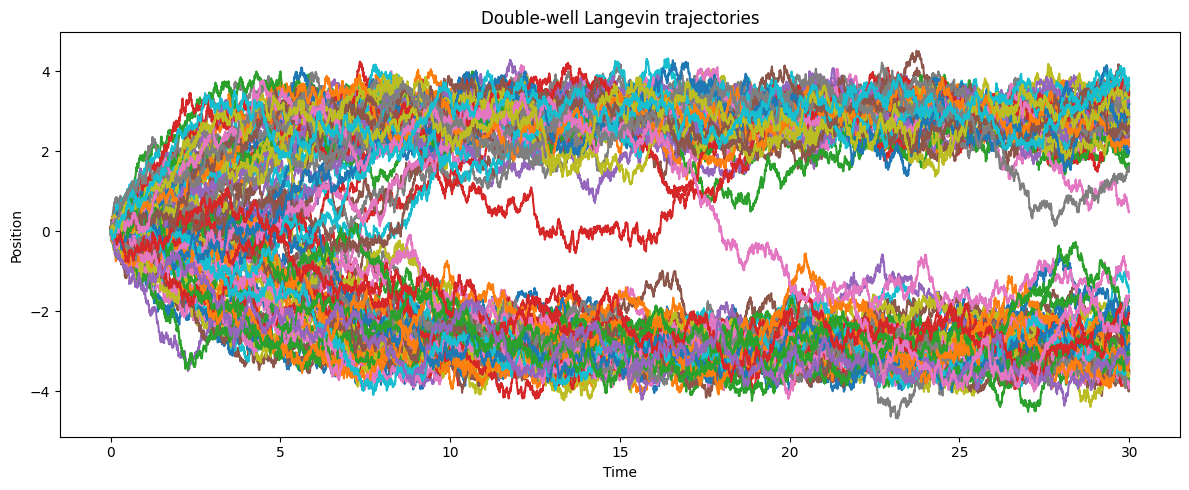

In [107]:
plt.figure(figsize=(12, 5))

dw,dwt=double_wells_generator(total_time=total_time, zeta=zeta,T=T,time_step=time_step,boltzmann=boltzman,right_well=right_well,left_well=left_well,
                          barrier_height=barrier_height,x0_mean=x0_mean,device=device  ,num_of_simulations=100,tilt=tilt)

for i in range(dw.shape[0]):
    plt.plot(dwt.cpu().numpy(), dw[i].cpu().numpy())
plt.title("Double-well Langevin trajectories")
plt.xlabel("Time")
plt.ylabel("Position")

plt.tight_layout()
plt.show()